In [1]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import os
from sliding_window import batch_p_r

batch_p_r(dir_containing_preds, scaling, clust_r, cor_r, clip_val=None):

In [2]:
dir_containing_preds = './batch_50/'

In [6]:
batch_p_r(dir_containing_preds, 5, 150, 5000)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 921
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 684
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 933
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 595
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 955
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 705
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 507
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 L

{'Curb Cut': (0.4330357142857143, 1.0),
 'Missing Cut': (0.20000000000000001, 0.35294117647058826),
 'Obstruction': (0.035273368606701938, 1.0),
 'Sfc Problem': (nan, 0.0)}

In [7]:
prs = []

for s in range(1, 16):
    pr = batch_p_r(dir_containing_preds, s, 150, 250)
    prs.append(pr)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 52
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 34
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 294
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 69
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 279
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 22
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 13
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded

Curb Cut       	0.05	0.10
Missing Cut    	nan	0.00
Obstruction    	0.01	0.35
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true

Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 810
Curb Cut       	0.04	0.09
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.30
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 1009
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 811
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 989
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 680
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 1026
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 t

Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 922
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 982
Curb Cut       	0.03	0.09
Missing Cut    	0.01	0.06
Obstruction    	0.01	0.35
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 1043
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 891
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 1018
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 766
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 t

Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 938
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 962
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 1035
Curb Cut       	0.03	0.09
Missing Cut    	0.01	0.06
Obstruction    	0.01	0.25
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 1063
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 943
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 1035
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10

Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 1055
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 964
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 1002
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 1055
Curb Cut       	0.03	0.09
Missing Cut    	0.01	0.06
Obstruction    	0.01	0.30
Sfc Problem    	nan	0.00


In [43]:
prs_var_s = prs

In [49]:
prs_var_s_no_clust = []

for s in range(1, 16):
    pr = batch_p_r(dir_containing_preds, s, 1, 250)
    prs_var_s_no_clust.append(pr)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 52
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 34
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 294
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 69
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Could not read predictions for bEkg5moFOXSgNDVZTeDbqg, skipping.
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 279
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 22
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions

Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 208
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 278
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 543
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 488
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 369
Curb Cut       	0.01	0.63
Missing Cut    	nan	0.00
Obstruction    	0.00	0.45
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true 

Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 589
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 902
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 670
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 857
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 916
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 868
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 

Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 1011
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 736
Processing predictions for bEkg5moFOXSgNDVZTeDbqg
	 Loaded 1091 predictions and 2 true labels
	 Clustered/ignored 1091 pts down to 1019
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 1072
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 954
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 668
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 633
Processing predictions for KTnw2kjFwKxqmsO1ad757w


Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 783
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 1026
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 1033
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 931
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 946
Processing predictions for x_Ho8Gbq8i0xY6etP5-0Tw
	 Could not read predictions for x_Ho8Gbq8i0xY6etP5-0Tw, skipping.
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 1025
Curb Cut       	0.01	0.74
Missing Cut    	0.00	0.11
Obstruction    	0

Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 1021
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 825
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 753
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Loaded 1090 predictions and 1 true labels
	 Clustered/ignored 1090 pts down to 812
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 957
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 728
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 971
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 L

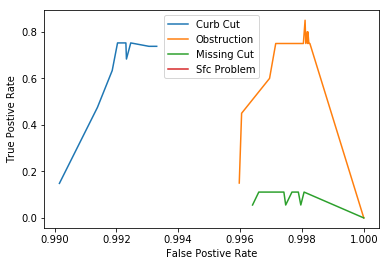

In [50]:
prs = prs_var_s_no_clust

data = collections.defaultdict(list)

for i, s in enumerate( range(1, 16) ):
    pr = prs[i]
    
    for label in pr:
        tpr = pr[label][1]
        fpr = 1.0 - pr[label][0]
        
        data[label].append((tpr, fpr))

for label, pts in data.iteritems():
    if len(pts) == 0: continue
    
    pts = sorted(pts, key=lambda x: x[1])
    
    tprs, fprs = zip(*pts)
    plt.plot(fprs, tprs, label=label)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend() 
plt.show()

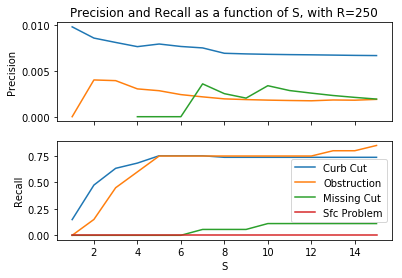

In [58]:
data = collections.defaultdict(list)

for i, s in enumerate( range(1, 16) ):
    pr = prs[i]
    
    for label in pr:
        precision = pr[label][0]
        recall = pr[label][1]
        
        data[label].append((s, precision, recall))

fig, axs = plt.subplots(2,1,sharex=True)
for label, pts in data.iteritems():
    if len(pts) == 0: continue
    
    
    ss, precisions, recalls = zip(*pts)
    axs[0].plot(ss, precisions, label=label)
    axs[1].plot(ss, recalls, label=label)
axs[0].set_title("Precision and Recall as a function of S, with R=250")
plt.xlabel('S')
axs[0].set_ylabel('Precision')
axs[1].set_ylabel('Recall')
plt.legend() 
plt.show()

In [23]:
prs_var_r = []

for r in range(100, 501,10):
    pr = batch_p_r(dir_containing_preds, 4, 150, r)
    prs_var_r.append(pr)

Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 L

Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.00	0.00
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.20
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 tr

Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.00	0.01
Missing Cut    	0.00	0.00
O

Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 

Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Could not read predictions for KTnw2kjFwKxqmsO1ad757w, skipping.
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predicti

Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Could not read predictions for KTnw2kjFwKxqmsO1ad757w, skipping.
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predict

Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.05	0.10
Missing Cut    	0.00	0.00
Obstruction    	0.01	0.35
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 tru

Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.08	0.16
Missing Cut    	0.00	0.00
Obstruction    	0.02	0.45
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true

Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 

Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Could not read predictions for KTnw2kjFwKxqmsO1ad757w, skipping.
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictions and 12 true labels
	 Clustered/ignored 1090 pts down to 391
Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predic

Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 Could not read predictions for KTnw2kjFwKxqmsO1ad757w, skipping.
Processing predictions for NcepbUdvIa4HNoRmAVVmqw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 832
Processing predictions for nOIswiZNuS7ZMcSAuX8NNw
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 455
Processing predictions for P1HQQUoERTUNnlGgMxjmyQ
	 Loaded 1090 predictio

Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 915
Processing predictions for ii9K_R2JpDrxG2zZNAjrHw
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 588
Processing predictions for JD08-qqW62uM3GAmI6Em5A
	 Loaded 1091 predictions and 3 true labels
	 Clustered/ignored 1091 pts down to 445
Processing predictions for jT7fyKdFY8h5Dsl164bWEQ
	 Loaded 1091 predictions and 0 true labels
	 Clustered/ignored 1091 pts down to 304
Processing predictions for KTnw2kjFwKxqmsO1ad757w
	 C

Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.12	0.24
Missing Cut    	0.00	0.00
Obstruction    	0.02	0.70
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true labels
	 Clustered/ignored 1091 pts down to 809
Processing predictions for 0xZrsam10eoysByU-5eleg
	 Loaded 1091 predictions and 8 true labels
	 Clustered/ignored 1091 pts down to 595
Processing predictions for 786rDc_Wai6pIpfo2Tgt0w
	 Loaded 1091 predictions and 14 true labels
	 Clustered/ignored 1091 pts down to 890
Processing predictions for aPHylcNtbXLdCmTUKIfOuQ
	 Loaded 1079 predictions and 10 true labels
	 Clustered/ignored 1079 pts down to 549
Processing predictions for ERQqgHPbGC-TMO3KV1RuKQ
	 Loaded 1091 predictions and 4 tru

Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 Loaded 1079 predictions and 6 true labels
	 Clustered/ignored 1079 pts down to 701
Processing predictions for zToK9h7Mig1OmZOYAtW5JQ
	 Loaded 1091 predictions and 6 true labels
	 Clustered/ignored 1091 pts down to 552
Curb Cut       	0.13	0.27
Missing Cut    	0.00	0.00
Obstruction    	0.03	0.75
Sfc Problem    	nan	0.00
Processing predictions for 0NZKRR2vi-iBSemGeaQoDw
	 Loaded 1091 predictions and 5 true

Processing predictions for Q74olW0vIZp4vGZqygrMBA
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 789
Processing predictions for RhUV-L9ePyqlJdo-O2ps5g
	 Loaded 1091 predictions and 23 true labels
	 Clustered/ignored 1091 pts down to 866
Processing predictions for RQUi1hNx9gmCHTQqRxwbKQ
	 Loaded 1090 predictions and 11 true labels
	 Clustered/ignored 1090 pts down to 633
Processing predictions for RzWfHZ7vx-4YpvSfIJea9Q
	 Loaded 1091 predictions and 4 true labels
	 Clustered/ignored 1091 pts down to 642
Processing predictions for UZ4fZSWOEAGJSLhwQCS4UQ
	 Loaded 1090 predictions and 5 true labels
	 Clustered/ignored 1090 pts down to 366
Processing predictions for wP8LaownYApLtGgtmim12A
	 Loaded 1091 predictions and 1 true labels
	 Clustered/ignored 1091 pts down to 536
Processing predictions for xfPJTUqVZSiVmTVFGCd6sw
	 Loaded 1091 predictions and 15 true labels
	 Clustered/ignored 1091 pts down to 669
Processing predictions for xQCb4FWX39Nsh4VSXXlksA
	 

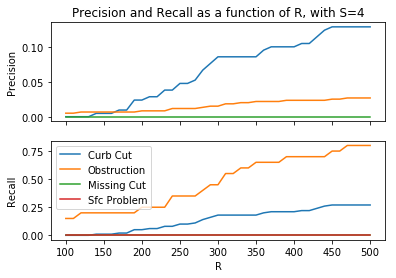

In [61]:
data = collections.defaultdict(list)

for i, r in enumerate( range(100, 501,10) ):
    pr = prs_var_r[i]
    
    for label in pr:
        precision = pr[label][0]
        recall = pr[label][1]
        
        data[label].append((r, precision, recall))


fig, axs = plt.subplots(2,1,sharex=True)
for label, pts in data.iteritems():
    if len(pts) == 0: continue
    
    
    rs, precisions, recalls = zip(*pts)
    axs[0].plot(rs, precisions, label=label)
    axs[1].plot(rs, recalls, label=label)
axs[0].set_title("Precision and Recall as a function of R, with S=4")
plt.xlabel('R')
axs[0].set_ylabel('Precision')
axs[1].set_ylabel('Recall')
plt.legend() 
plt.show()

41
41


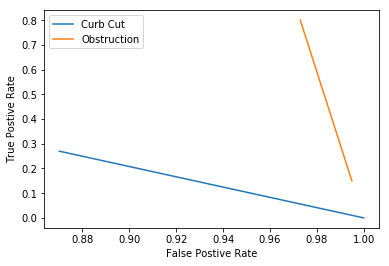

In [60]:
data = collections.defaultdict(list)

for i, s in enumerate( range(100, 501,10) ):
    pr = prs_var_r[i]
    
    for label in pr:
        tpr = pr[label][1]
        fpr = 1.0 - pr[label][0]
        
        precision = pr[label][0]
        recall = pr[label][1]
        
        data[label].append((tpr, fpr))
        
for label, pts in data.iteritems():
    if label in ('Sfc Problem', "Missing Cut"): continue
    print len(pts)
    
    pts = sorted(pts, key=lambda x: x[1])
    
    tprs, fprs = zip(*pts)
    plt.plot(fprs, tprs, label=label)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend() 
plt.show()